In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.io import arff
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#Load dataset and divide them into train : test =8:2
#df1=pd.read_csv('C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/dataset-of-00s.csv')
#df2=pd.read_csv('C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/dataset-of-10s.csv')
#DATA=pd.concat([df1,df2])
#print(df1.shape)
#print(df2.shape)
#print(DATA.shape)
#DATA.reset_index(drop=True, inplace=True)
#DATA
#DATA=DATA.sample(frac=1.0)
#DATA.reset_index(drop=True, inplace=True)#shuffle the dataset
#DATA
#train_set=DATA.loc[0:9816]
#test_set=DATA.loc[9817:12270]
#test_set.reset_index(drop=True, inplace=True)
#print("split the dataset into the proportion train:test=8:2 ")
#print("size of train set=",train_set.shape)
#print("size of test set=",test_set.shape)
#df=test_set.loc[test_set['target'].isin(['1'])]
#print("the target is 1 in test",df.shape)
#test_set.to_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/test_set.csv")
#train_set.to_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/train_set.csv")
#print("Save train and test dataset successfully!")

(5872, 19)
(6398, 19)
(12270, 19)
split the dataset into the proportion train:test=8:2 
size of train set= (9817, 19)
size of test set= (2453, 19)
the target is 1 in test (1205, 19)
Save train and test dataset successfully!


In [2]:
train_set=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/train_set.csv",
                      encoding='unicode_escape')
train_set=train_set.drop(["Unnamed: 0"],axis=1)
test_set=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/test_set.csv",
                     encoding='unicode_escape').drop(["Unnamed: 0"],axis=1)
print("size of train set=",train_set.shape)
print("size of test set=",test_set.shape)
#train_set

size of train set= (9817, 19)
size of test set= (2453, 19)


In [4]:
DATA_miss=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/data set with missing data.csv",
                      encoding='unicode_escape')
DATA_miss.shape

(12254, 20)

In [5]:
DATA_miss.isnull().sum()

Unnamed: 0             0
track                  0
artist                77
uri                   98
danceability        1492
energy                 0
key                    0
loudness               0
mode                   0
speechiness           46
acousticness         648
instrumentalness      50
liveness               0
valence                0
tempo                  0
duration_ms            0
time_signature         0
chorus_hit             0
sections               0
target                 0
dtype: int64

In [6]:
train_set_miss=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/train_set_miss.csv",
                      encoding='unicode_escape')
train_set_miss=train_set_miss.drop(["Unnamed: 0"],axis=1)
test_set_miss=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/test_set_miss.csv",
                     encoding='unicode_escape').drop(["Unnamed: 0"],axis=1)
print("size of train set=",train_set_miss.shape)
print("size of test set=",test_set_miss.shape)
#train_set

size of train set= (9817, 20)
size of test set= (2437, 20)


In [71]:
def MissValue(data):
    miss_ratio = (data.isnull().sum() / len(data)) * 100
    miss_ratio = miss_ratio.sort_values(ascending=False)
    AllNull_train_ratio = miss_ratio.drop(miss_ratio[miss_ratio == 0].index)
    missing_train_ratio = pd.DataFrame({'Missing train data ratio': AllNull_train_ratio})
    print(missing_train_ratio)

    f, ax = plt.subplots(figsize=(10, 10))
    plt.xticks(rotation='90')  # ratate direction of words for each feature
    sns.barplot(x=miss_ratio.index, y=miss_ratio)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent', fontsize=15)
    plt.title('Percentage of Missing Data', fontsize=15)
    plt.show()

                  Missing train data ratio
danceability                     12.175616
acousticness                      5.288069
uri                               0.799739
artist                            0.628366
instrumentalness                  0.408030
speechiness                       0.375388


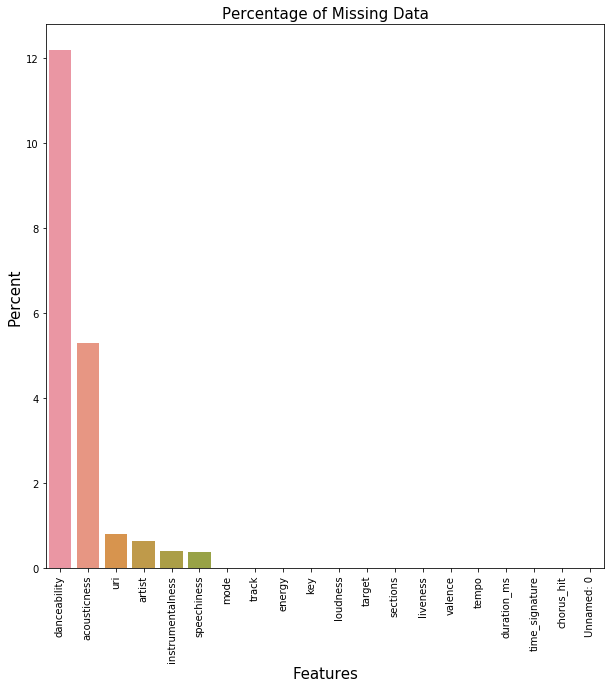

In [72]:
MissValue(DATA_miss)

                  Missing train data ratio
danceability                     12.132016
acousticness                      5.225629
uri                               0.784354
artist                            0.621371
speechiness                       0.407456
instrumentalness                  0.397270


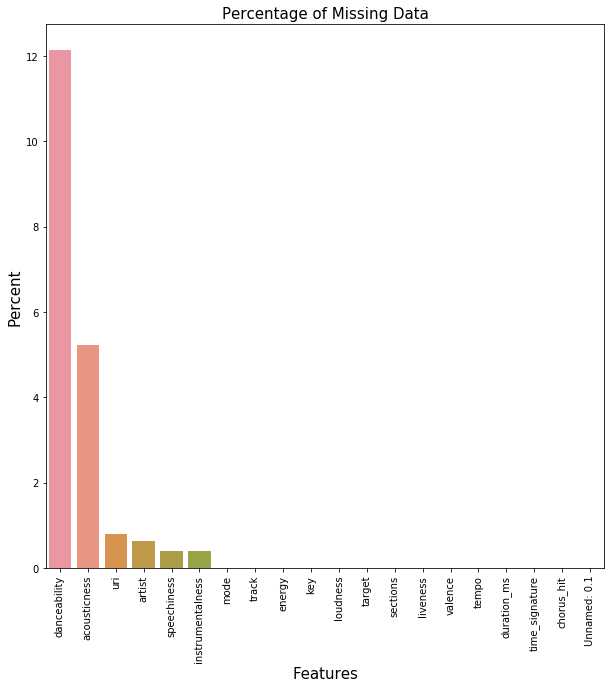

In [73]:
MissValue(train_set_miss)

In [15]:
#delete "uri and artist"
train_miss_numerical=train_set_miss.drop(['track'], axis=1)
train_miss_numerical=train_miss_numerical.drop(['artist','uri','Unnamed: 0.1'], axis=1)
train_miss_numerical.shape

(9817, 16)

In [16]:
test_miss_numerical=test_set_miss.drop(['track'], axis=1)
test_miss_numerical=test_miss_numerical.drop(['artist','uri','Unnamed: 0.1'], axis=1)
test_miss_numerical.shape

(2437, 16)

In [17]:
test_miss_numerical.isnull().sum()

danceability        301
energy                0
key                   0
loudness              0
mode                  0
speechiness           6
acousticness        135
instrumentalness     11
liveness              0
valence               0
tempo                 0
duration_ms           0
time_signature        0
chorus_hit            0
sections              0
target                0
dtype: int64

In [18]:
#for missing value in instrumentalness and acousticness - delete the datapoint
train_miss_numerical=train_miss_numerical.dropna(subset=['instrumentalness',
                                                        'speechiness'], how='any')
print(train_miss_numerical.shape)
test_miss_numerical=test_miss_numerical.dropna(subset=['instrumentalness',
                                                        'speechiness'], how='any')
print(test_miss_numerical.shape)

(9743, 16)
(2421, 16)


In [19]:
from sklearn.impute import KNNImputer
impute_knn=KNNImputer(n_neighbors=2)
impute_knn.fit(train_miss_numerical)
impute_knn_=impute_knn.transform(train_miss_numerical)
df_train=pd.DataFrame(impute_knn_)

df_train.columns = ['danceability','energy','key','loudness','mode','speechiness','acousticness',
                   'instrumentalness','liveness','valence','tempo','duration_ms','time_signature','chorus_hit',
                    'sections','target']
df_train.shape

(9743, 16)

In [20]:
#impute_knn_test=KNNImputer(n_neighbors=2)
#impute_knn_test.fit(test_miss_numerical)
impute_knn_test=impute_knn.transform(test_miss_numerical)
df_test=pd.DataFrame(impute_knn_test)

df_test.columns = ['danceability','energy','key','loudness','mode','speechiness','acousticness',
                   'instrumentalness','liveness','valence','tempo','duration_ms','time_signature','chorus_hit',
                    'sections','target']
df_test.shape

(2421, 16)

In [21]:
df_test.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [75]:
#Preprocessing & feature extraction
#delete missing data because only 16 which is a very small number
#the feature：track, artist, uri are not usable features, so delete them.
#outlier
train_set_numerical=train_set.drop(['track'], axis=1)
train_set_numerical=train_set_numerical.drop(['artist','uri'], axis=1)
#train_set_numerical
for column,row in train_set_numerical.iteritems():
    #print(index) # 输出列名
    df_column=train_set[column].describe()
    IQR=df_column["75%"]-df_column["25%"]
    if (df_column["min"]>df_column["25%"]-1.5*IQR)&(df_column["max"]<df_column["75%"]+1.5*IQR):
        print("No outlier for column", column)
    else:
        print("Have outlier of ",column)

No outlier for column danceability
Have outlier of  energy
No outlier for column key
Have outlier of  loudness
No outlier for column mode
Have outlier of  speechiness
Have outlier of  acousticness
Have outlier of  instrumentalness
Have outlier of  liveness
No outlier for column valence
Have outlier of  tempo
Have outlier of  duration_ms
Have outlier of  time_signature
Have outlier of  chorus_hit
Have outlier of  sections
No outlier for column target


In [82]:
x_train_outlier=train_set_numerical.drop(['target'],axis=1)
y_train_outlier=train_set_numerical['target']
model_log_outlier=LogisticRegression(penalty="l2")
model_log_noutlier=model_log_outlier.fit(x_train_outlier, y_train_outlier)

pred_train_log_outlier=model_log_outlier.predict(x_train_outlier)

acc_train_logistic_outlier = accuracy_score(pred_train_log_outlier, y_train_outlier)


print("the train accuracy =", acc_train_logistic_outlier)
print('REC of training set = ',recall_score(y_train_outlier,pred_train_log_outlier,average='micro'))
print('F1-Score of training set = ',f1_score(y_train_outlier,pred_train_log_outlier,average='micro'))
print("")

the train accuracy = 0.5310176224915962
REC of training set =  0.5310176224915962
F1-Score of training set =  0.5310176224915962



In [22]:
for column,row in df_train.iteritems():
    #print(index) # 输出列名
    df_column=df_train[column].describe()
    IQR=df_column["75%"]-df_column["25%"]
    if (df_column["min"]>df_column["25%"]-1.5*IQR)&(df_column["max"]<df_column["75%"]+1.5*IQR):
        print("No outlier for column", column)
    else:
        print("Have outlier of ",column)

Have outlier of  danceability
Have outlier of  energy
No outlier for column key
Have outlier of  loudness
No outlier for column mode
Have outlier of  speechiness
Have outlier of  acousticness
Have outlier of  instrumentalness
Have outlier of  liveness
No outlier for column valence
Have outlier of  tempo
Have outlier of  duration_ms
Have outlier of  time_signature
Have outlier of  chorus_hit
Have outlier of  sections
No outlier for column target


In [23]:
#deal with the outlier
df_energy=train_set["energy"].describe()
IQR_energy=df_energy["75%"]-df_energy["25%"]
train_set_numerical["energy"][train_set_numerical.energy>df_energy["75%"]+1.5*IQR_energy]=df_energy["75%"]+1.5*IQR_energy
train_set_numerical["energy"][train_set_numerical.energy<df_energy["25%"]-1.5*IQR_energy]=df_energy["25%"]-1.5*IQR_energy

df_loudness=train_set["loudness"].describe()
IQR_loudness=df_loudness["75%"]-df_loudness["25%"]
train_set_numerical["loudness"][train_set_numerical.loudness>df_energy["75%"]+1.5*IQR_loudness]=df_loudness["75%"]+1.5*IQR_loudness
train_set_numerical["loudness"][train_set_numerical.loudness<df_energy["25%"]-1.5*IQR_loudness]=df_loudness["25%"]-1.5*IQR_loudness

df_speechiness=train_set["speechiness"].describe()
IQR_speechiness=df_speechiness["75%"]-df_speechiness["25%"]
train_set_numerical["speechiness"][train_set_numerical.speechiness
                                   >df_speechiness["75%"]+1.5*IQR_speechiness]=df_speechiness["75%"]+1.5*IQR_speechiness
train_set_numerical["speechiness"][train_set_numerical.speechiness
                                   <df_speechiness["25%"]-1.5*IQR_speechiness]=df_speechiness["25%"]-1.5*IQR_speechiness

df_acousticness=train_set["acousticness"].describe()
IQR_acousticness=df_acousticness["75%"]-df_acousticness["25%"]
train_set_numerical["acousticness"][train_set_numerical.acousticness
                                    >df_acousticness["75%"]+1.5*IQR_acousticness]=df_acousticness["75%"]+1.5*IQR_acousticness
train_set_numerical["acousticness"][train_set_numerical.acousticness
                                    <df_acousticness["25%"]-1.5*IQR_acousticness]=df_acousticness["25%"]-1.5*IQR_acousticness

df_instrumentalness=train_set["instrumentalness"].describe()
IQR_instrumentalness=df_instrumentalness["75%"]-df_instrumentalness["25%"]
train_set_numerical["instrumentalness"][train_set_numerical.instrumentalness
                              >df_instrumentalness["75%"]+1.5*IQR_instrumentalness]=df_instrumentalness["75%"]+1.5*IQR_instrumentalness
train_set_numerical["instrumentalness"][train_set_numerical.instrumentalness
                              <df_instrumentalness["25%"]-1.5*IQR_instrumentalness]=df_instrumentalness["25%"]-1.5*IQR_instrumentalness

df_liveness=train_set["liveness"].describe()
IQR_liveness=df_liveness["75%"]-df_liveness["25%"]
train_set_numerical["liveness"][train_set_numerical.liveness>df_liveness["75%"]+1.5*IQR_liveness]=df_liveness["75%"]+1.5*IQR_liveness
train_set_numerical["liveness"][train_set_numerical.liveness<df_liveness["25%"]-1.5*IQR_liveness]=df_liveness["25%"]-1.5*IQR_liveness

df_tempo=train_set["tempo"].describe()
IQR_tempo=df_tempo["75%"]-df_tempo["25%"]
train_set_numerical["tempo"][train_set_numerical.tempo>df_tempo["75%"]+1.5*IQR_tempo]=df_tempo["75%"]+1.5*IQR_tempo
train_set_numerical["tempo"][train_set_numerical.tempo<df_tempo["25%"]-1.5*IQR_tempo]=df_tempo["25%"]-1.5*IQR_tempo

df_duration_ms=train_set["duration_ms"].describe()
IQR_duration_ms=df_duration_ms["75%"]-df_duration_ms["25%"]
train_set_numerical["duration_ms"][train_set_numerical.duration_ms
                                   >df_duration_ms["75%"]+1.5*IQR_duration_ms]=df_duration_ms["75%"]+1.5*IQR_duration_ms
train_set_numerical["duration_ms"][train_set_numerical.duration_ms
                                   <df_duration_ms["25%"]-1.5*IQR_duration_ms]=df_duration_ms["25%"]-1.5*IQR_duration_ms

df_time_signature=train_set["time_signature"].describe()
IQR_time_signature=df_time_signature["75%"]-df_time_signature["25%"]
train_set_numerical["time_signature"][train_set_numerical.time_signature
                                      >df_time_signature["75%"]+1.5*IQR_time_signature]=df_time_signature["75%"]+1.5*IQR_time_signature
train_set_numerical["time_signature"][train_set_numerical.time_signature
                                      <df_time_signature["25%"]-1.5*IQR_time_signature]=df_time_signature["25%"]-1.5*IQR_time_signature

df_chorus_hit=train_set["chorus_hit"].describe()
IQR_chorus_hit=df_chorus_hit["75%"]-df_chorus_hit["25%"]
train_set_numerical["chorus_hit"][train_set_numerical.chorus_hit
                                  >df_chorus_hit["75%"]+1.5*IQR_chorus_hit]=df_chorus_hit["75%"]+1.5*IQR_chorus_hit
train_set_numerical["chorus_hit"][train_set_numerical.chorus_hit
                                  <df_chorus_hit["25%"]-1.5*IQR_chorus_hit]=df_chorus_hit["25%"]-1.5*IQR_chorus_hit

df_sections=train_set["sections"].describe()
IQR_sections=df_sections["75%"]-df_sections["25%"]
train_set_numerical["sections"][train_set_numerical.sections>df_sections["75%"]+1.5*IQR_sections]=df_sections["75%"]+1.5*IQR_sections
train_set_numerical["sections"][train_set_numerical.sections<df_sections["25%"]-1.5*IQR_sections]=df_sections["25%"]-1.5*IQR_sections


for column,row in train_set_numerical.iteritems():
    #print(index) #output the index of column
    df_column=train_set_numerical[column].describe()
    IQR=df_column["75%"]-df_column["25%"]
    if (df_column["min"]>= df_column["25%"]-1.5*IQR)&(df_column["max"]<= df_column["75%"]+1.5*IQR):
        print("no outlier for column", column)
    else:
        print("process for the outlier of",column)
        
print("")
print("Process all the outlier successfully! ")

no outlier for column danceability
no outlier for column energy
no outlier for column key
no outlier for column loudness
no outlier for column mode
no outlier for column speechiness
no outlier for column acousticness
no outlier for column instrumentalness
no outlier for column liveness
no outlier for column valence
no outlier for column tempo
no outlier for column duration_ms
no outlier for column time_signature
no outlier for column chorus_hit
no outlier for column sections
no outlier for column target

Process all the outlier successfully! 


In [24]:
#deal with the outlier
df_danceability=df_train["danceability"].describe()
IQR_danceability=df_danceability["75%"]-df_danceability["25%"]
df_train["danceability"][df_train.danceability>df_danceability["75%"]+1.5*IQR_danceability]=df_danceability["75%"]+1.5*IQR_danceability
df_train["danceability"][df_train.danceability<df_danceability["25%"]-1.5*IQR_danceability]=df_danceability["25%"]-1.5*IQR_danceability

df_energy=df_train["energy"].describe()
IQR_energy=df_energy["75%"]-df_energy["25%"]
df_train["energy"][df_train.energy>df_energy["75%"]+1.5*IQR_energy]=df_energy["75%"]+1.5*IQR_energy
df_train["energy"][df_train.energy<df_energy["25%"]-1.5*IQR_energy]=df_energy["25%"]-1.5*IQR_energy

df_loudness=df_train["loudness"].describe()
IQR_loudness=df_loudness["75%"]-df_loudness["25%"]
df_train["loudness"][df_train.loudness>df_energy["75%"]+1.5*IQR_loudness]=df_loudness["75%"]+1.5*IQR_loudness
df_train["loudness"][df_train.loudness<df_energy["25%"]-1.5*IQR_loudness]=df_loudness["25%"]-1.5*IQR_loudness

df_speechiness=df_train["speechiness"].describe()
IQR_speechiness=df_speechiness["75%"]-df_speechiness["25%"]
df_train["speechiness"][df_train.speechiness
                                   >df_speechiness["75%"]+1.5*IQR_speechiness]=df_speechiness["75%"]+1.5*IQR_speechiness
df_train["speechiness"][df_train.speechiness
                                   <df_speechiness["25%"]-1.5*IQR_speechiness]=df_speechiness["25%"]-1.5*IQR_speechiness

df_acousticness=df_train["acousticness"].describe()
IQR_acousticness=df_acousticness["75%"]-df_acousticness["25%"]
df_train["acousticness"][df_train.acousticness
                                    >df_acousticness["75%"]+1.5*IQR_acousticness]=df_acousticness["75%"]+1.5*IQR_acousticness
df_train["acousticness"][df_train.acousticness
                                    <df_acousticness["25%"]-1.5*IQR_acousticness]=df_acousticness["25%"]-1.5*IQR_acousticness

df_instrumentalness=df_train["instrumentalness"].describe()
IQR_instrumentalness=df_instrumentalness["75%"]-df_instrumentalness["25%"]
df_train["instrumentalness"][df_train.instrumentalness
                              >df_instrumentalness["75%"]+1.5*IQR_instrumentalness]=df_instrumentalness["75%"]+1.5*IQR_instrumentalness
df_train["instrumentalness"][df_train.instrumentalness
                              <df_instrumentalness["25%"]-1.5*IQR_instrumentalness]=df_instrumentalness["25%"]-1.5*IQR_instrumentalness

df_liveness=df_train["liveness"].describe()
IQR_liveness=df_liveness["75%"]-df_liveness["25%"]
df_train["liveness"][df_train.liveness>df_liveness["75%"]+1.5*IQR_liveness]=df_liveness["75%"]+1.5*IQR_liveness
df_train["liveness"][df_train.liveness<df_liveness["25%"]-1.5*IQR_liveness]=df_liveness["25%"]-1.5*IQR_liveness

df_tempo=df_train["tempo"].describe()
IQR_tempo=df_tempo["75%"]-df_tempo["25%"]
df_train["tempo"][df_train.tempo>df_tempo["75%"]+1.5*IQR_tempo]=df_tempo["75%"]+1.5*IQR_tempo
df_train["tempo"][df_train.tempo<df_tempo["25%"]-1.5*IQR_tempo]=df_tempo["25%"]-1.5*IQR_tempo

df_duration_ms=df_train["duration_ms"].describe()
IQR_duration_ms=df_duration_ms["75%"]-df_duration_ms["25%"]
df_train["duration_ms"][df_train.duration_ms
                                   >df_duration_ms["75%"]+1.5*IQR_duration_ms]=df_duration_ms["75%"]+1.5*IQR_duration_ms
df_train["duration_ms"][df_train.duration_ms
                                   <df_duration_ms["25%"]-1.5*IQR_duration_ms]=df_duration_ms["25%"]-1.5*IQR_duration_ms

df_time_signature=df_train["time_signature"].describe()
IQR_time_signature=df_time_signature["75%"]-df_time_signature["25%"]
df_train["time_signature"][df_train.time_signature
                                      >df_time_signature["75%"]+1.5*IQR_time_signature]=df_time_signature["75%"]+1.5*IQR_time_signature
df_train["time_signature"][df_train.time_signature
                                      <df_time_signature["25%"]-1.5*IQR_time_signature]=df_time_signature["25%"]-1.5*IQR_time_signature

df_chorus_hit=df_train["chorus_hit"].describe()
IQR_chorus_hit=df_chorus_hit["75%"]-df_chorus_hit["25%"]
df_train["chorus_hit"][df_train.chorus_hit
                                  >df_chorus_hit["75%"]+1.5*IQR_chorus_hit]=df_chorus_hit["75%"]+1.5*IQR_chorus_hit
df_train["chorus_hit"][df_train.chorus_hit
                                  <df_chorus_hit["25%"]-1.5*IQR_chorus_hit]=df_chorus_hit["25%"]-1.5*IQR_chorus_hit

df_sections=df_train["sections"].describe()
IQR_sections=df_sections["75%"]-df_sections["25%"]
df_train["sections"][df_train.sections>df_sections["75%"]+1.5*IQR_sections]=df_sections["75%"]+1.5*IQR_sections
df_train["sections"][df_train.sections<df_sections["25%"]-1.5*IQR_sections]=df_sections["25%"]-1.5*IQR_sections


for column,row in df_train.iteritems():
    #print(index) #output the index of column
    df_column=df_train[column].describe()
    IQR=df_column["75%"]-df_column["25%"]
    if (df_column["min"]>= df_column["25%"]-1.5*IQR)&(df_column["max"]<= df_column["75%"]+1.5*IQR):
        print("no outlier for column", column)
    else:
        print("process for the outlier of",column)
        
print("")
print("Process all the outlier successfully! ")

no outlier for column danceability
no outlier for column energy
no outlier for column key
no outlier for column loudness
no outlier for column mode
no outlier for column speechiness
no outlier for column acousticness
no outlier for column instrumentalness
no outlier for column liveness
no outlier for column valence
no outlier for column tempo
no outlier for column duration_ms
no outlier for column time_signature
no outlier for column chorus_hit
no outlier for column sections
no outlier for column target

Process all the outlier successfully! 


In [38]:
#stdandarization
#self.mean, self.std = X_train.mean(), X_train.std()
#self.feature_num = len(X_train.columns.tolist())
X_train=train_set_numerical.drop(['target'], axis=1)
std_X_train = (X_train - X_train.mean()) / X_train.std()
test_set_n=test_set.drop(['track','artist','uri'],axis=1)
#test_set_numerical=
#applied the std of X_train to the test setb
std_X_test= (test_set_n.drop(['target'],axis=1)- X_train.mean()) / X_train.std()
std_x_test=std_X_test.drop(['time_signature'],axis=1)
std_x_test

#std_X_test = (X_test - X_train.mean()) / X_train.std()

#find out the time_signature are almostly the same so drop it.
std_X_train=std_X_train.drop(['time_signature'],axis=1)
std_X_train.shape

(9817, 14)

In [39]:
#stdandarization for missing data
X_train_miss=df_train.drop(['target'], axis=1)
std_X_train_miss = (X_train_miss - X_train_miss.mean()) / X_train_miss.std()
test_set_n_miss=df_test
#applied the std of X_train to the test setb
std_X_test_miss= (test_set_n_miss.drop(['target'],axis=1)- X_train_miss.mean()) / X_train_miss.std()
std_x_test_miss=std_X_test_miss.drop(['time_signature'],axis=1)
std_x_test_miss

#find out the time_signature are almostly the same so drop it.
std_X_train_miss=std_X_train_miss.drop(['time_signature'],axis=1)
std_X_train_miss.shape

(9743, 14)

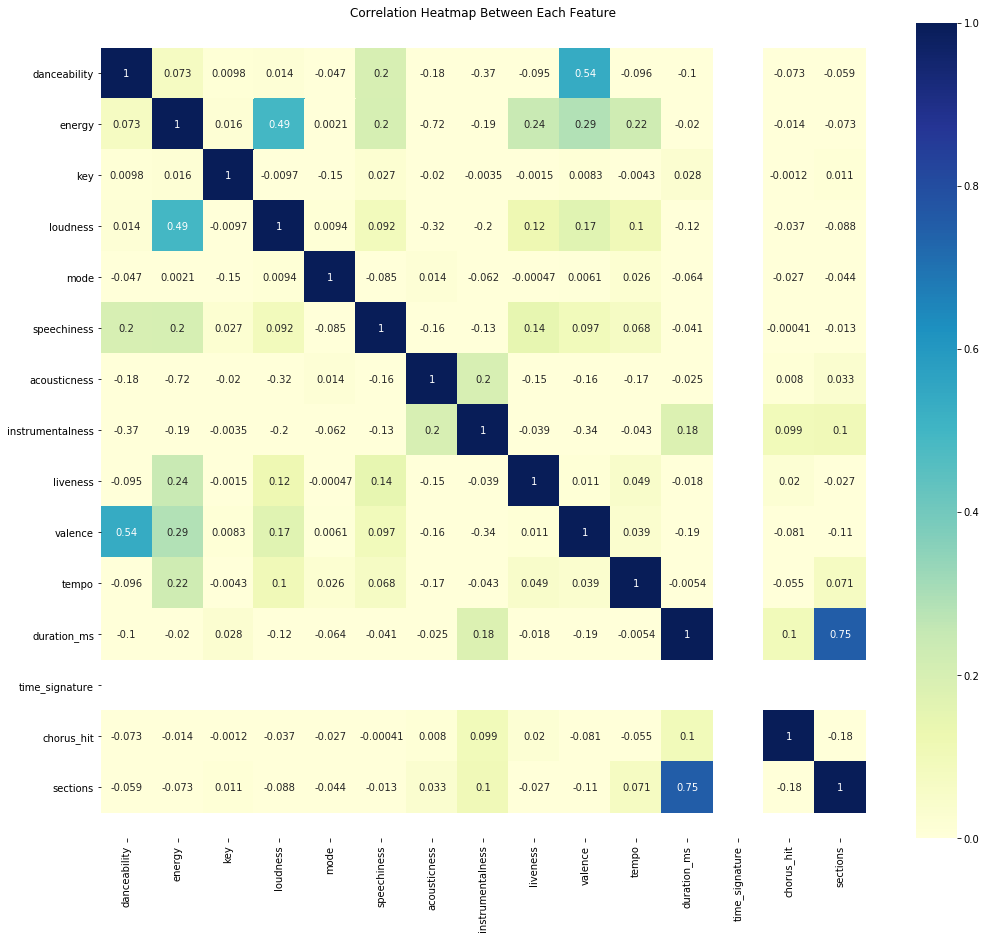

In [83]:
corrmat = X_train.corr()
plt.subplots(figsize=(18, 15))
ax = sns.heatmap(corrmat, vmax=1, annot=True, square=True, vmin=0,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Heatmap Between Each Feature')
plt.show()

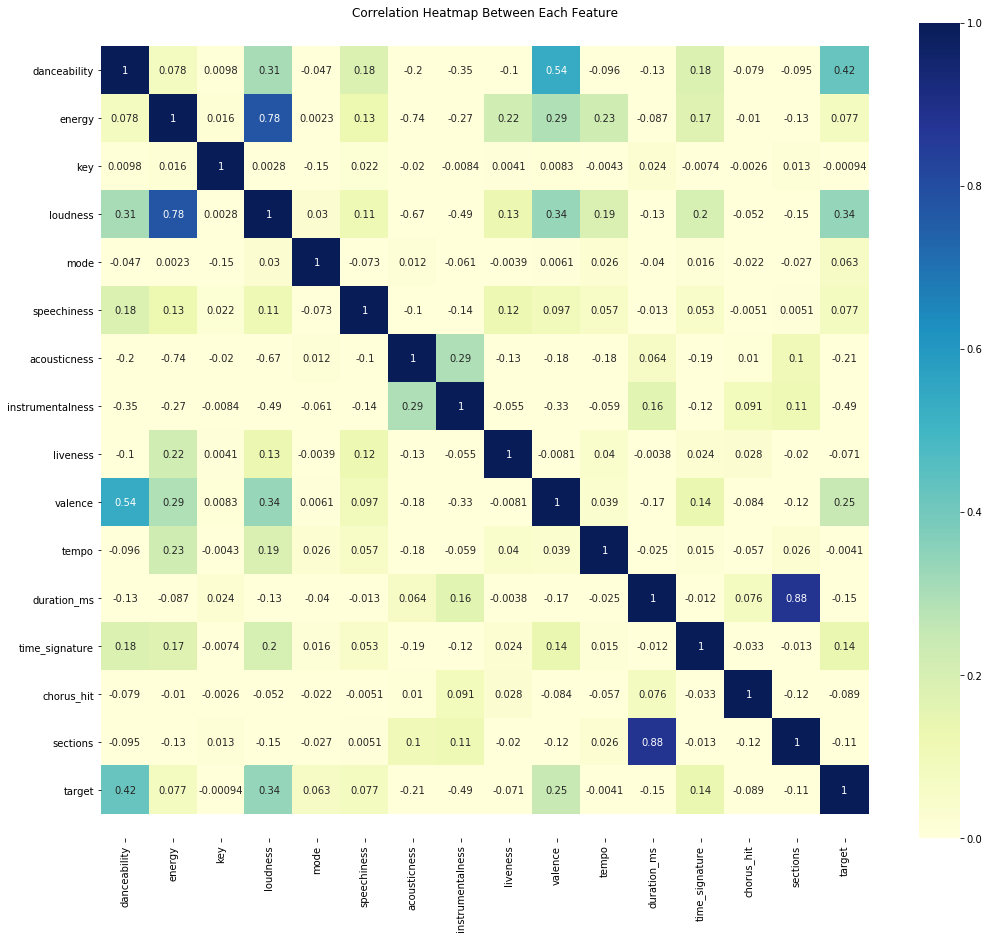

In [86]:
corrmat = train_set.corr()
plt.subplots(figsize=(18, 15))
ax = sns.heatmap(corrmat, vmax=1, annot=True, square=True, vmin=0,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Heatmap Between Each Feature')
plt.show()

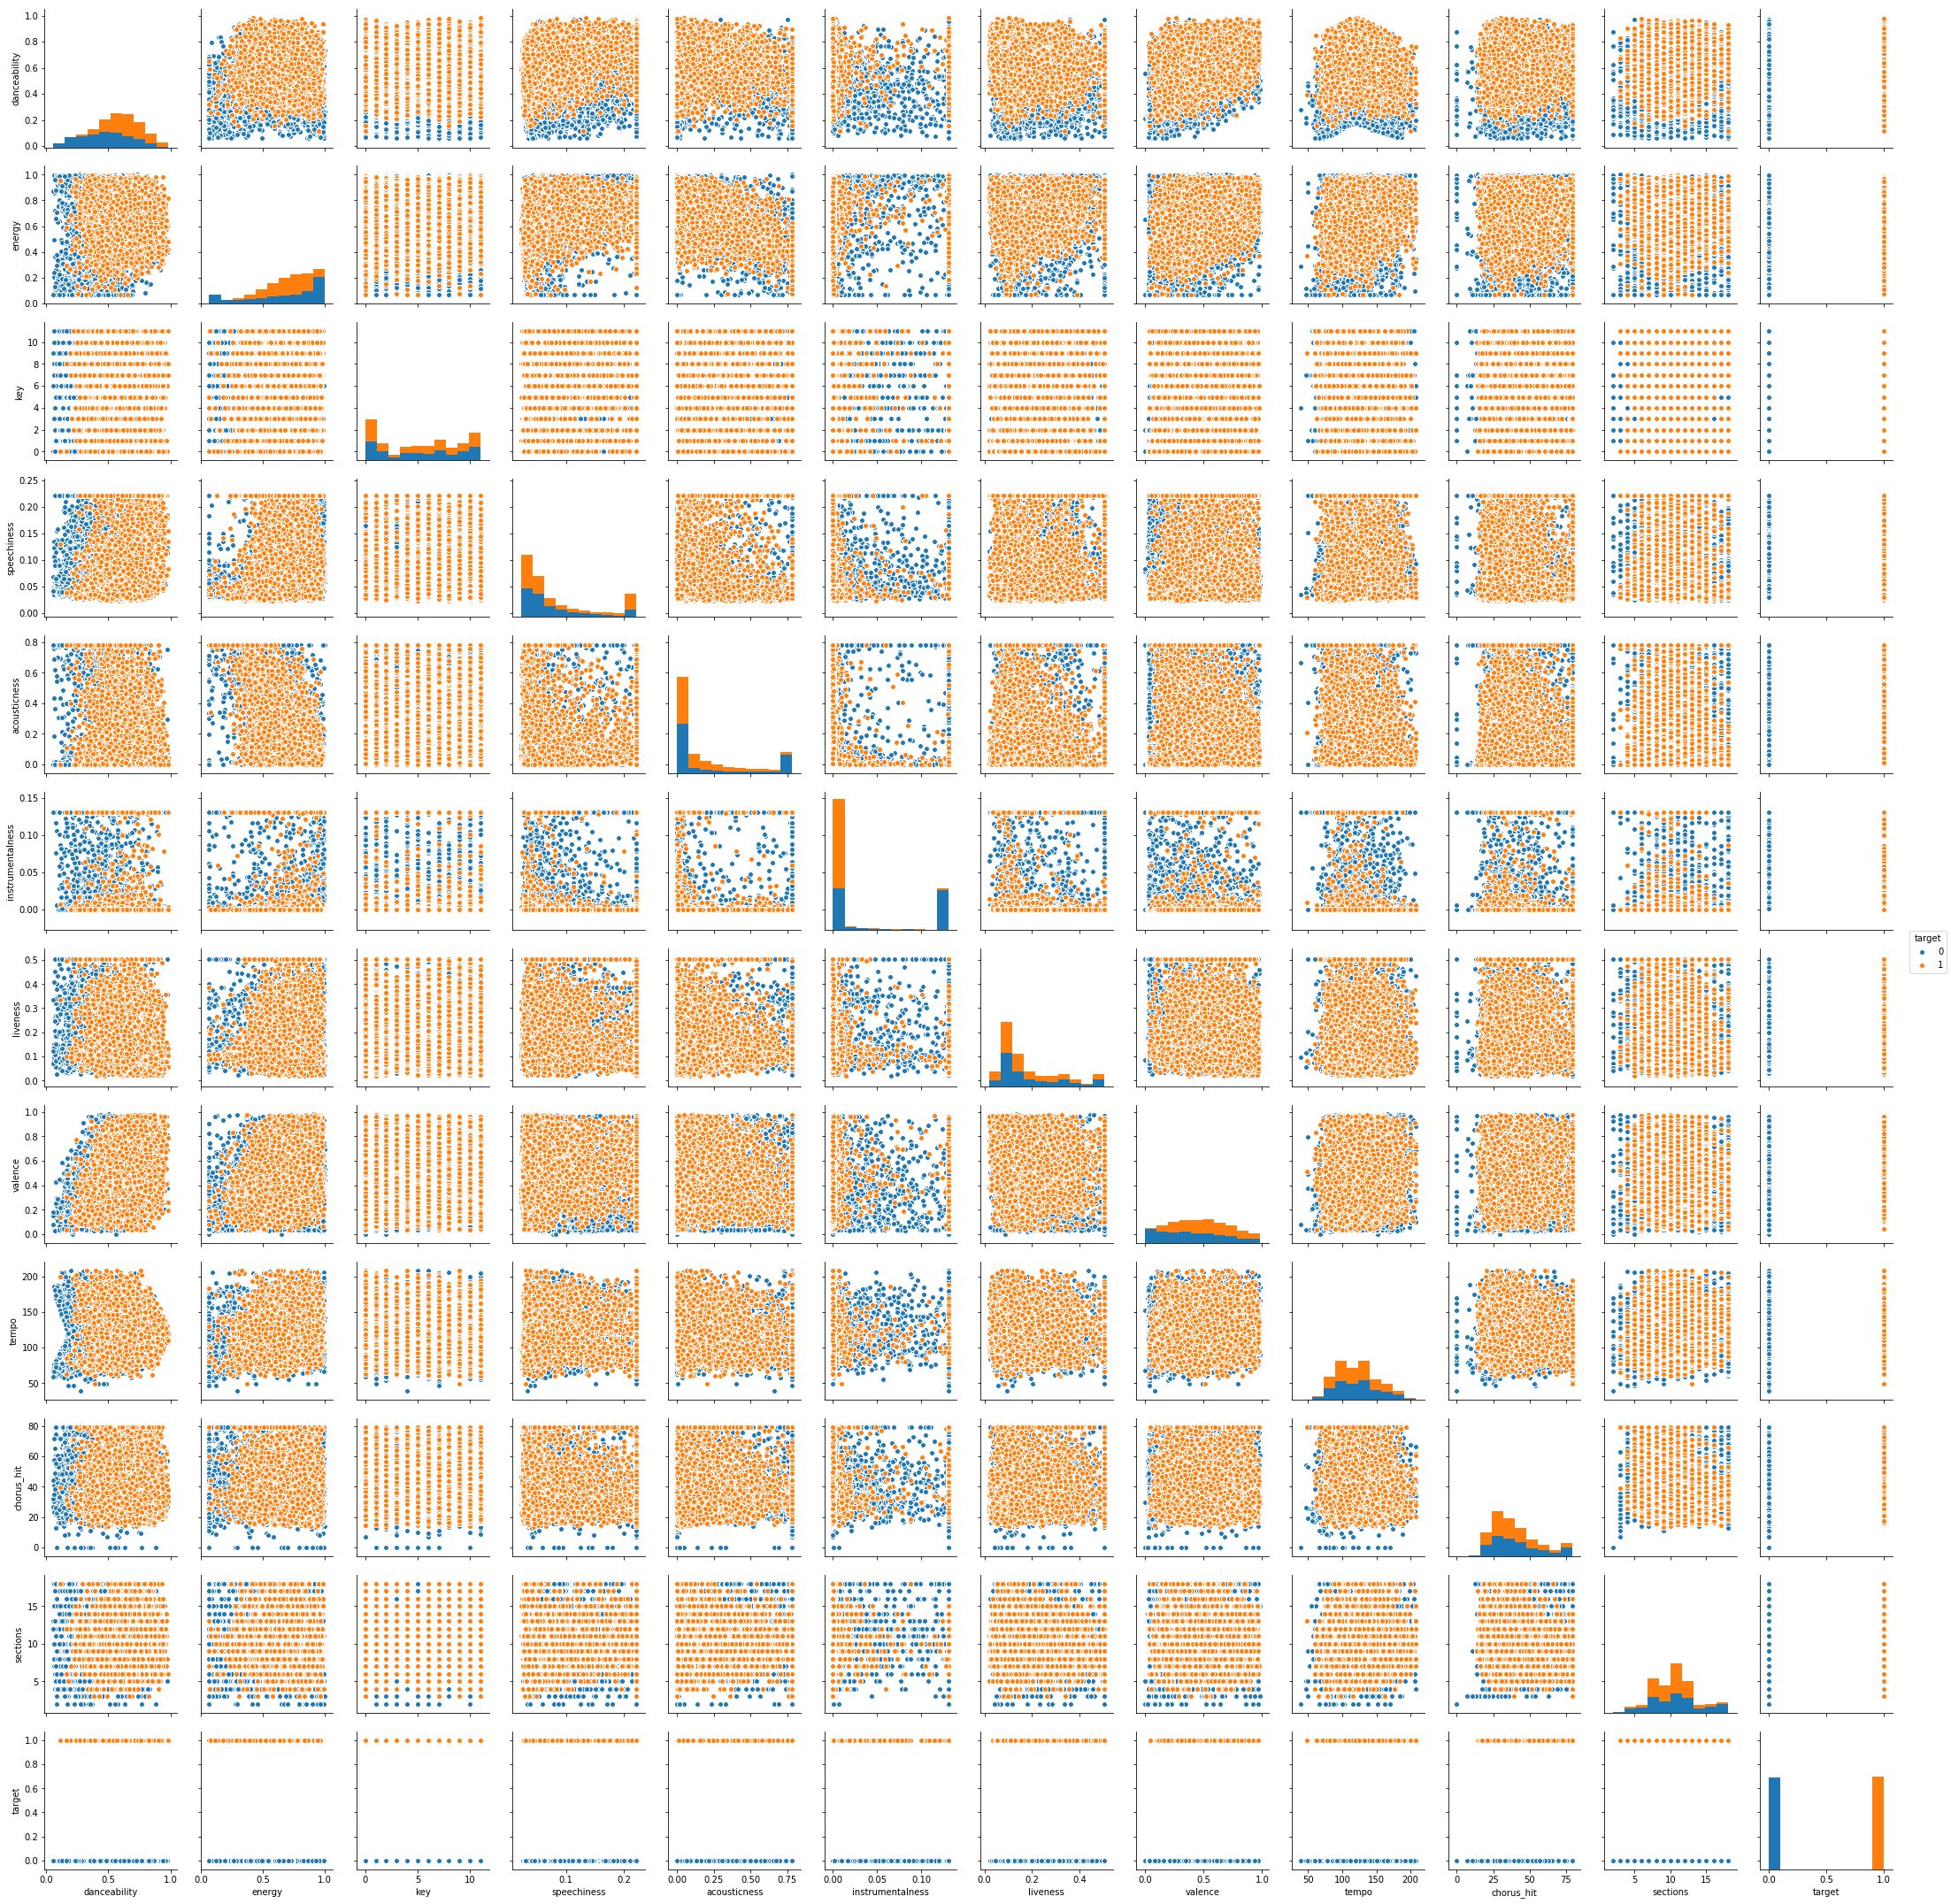

In [8]:
sns.pairplot(train_set_numerical.drop(['loudness','mode','time_signature','duration_ms'],axis=1), hue="target", kind="scatter")
plt.show()

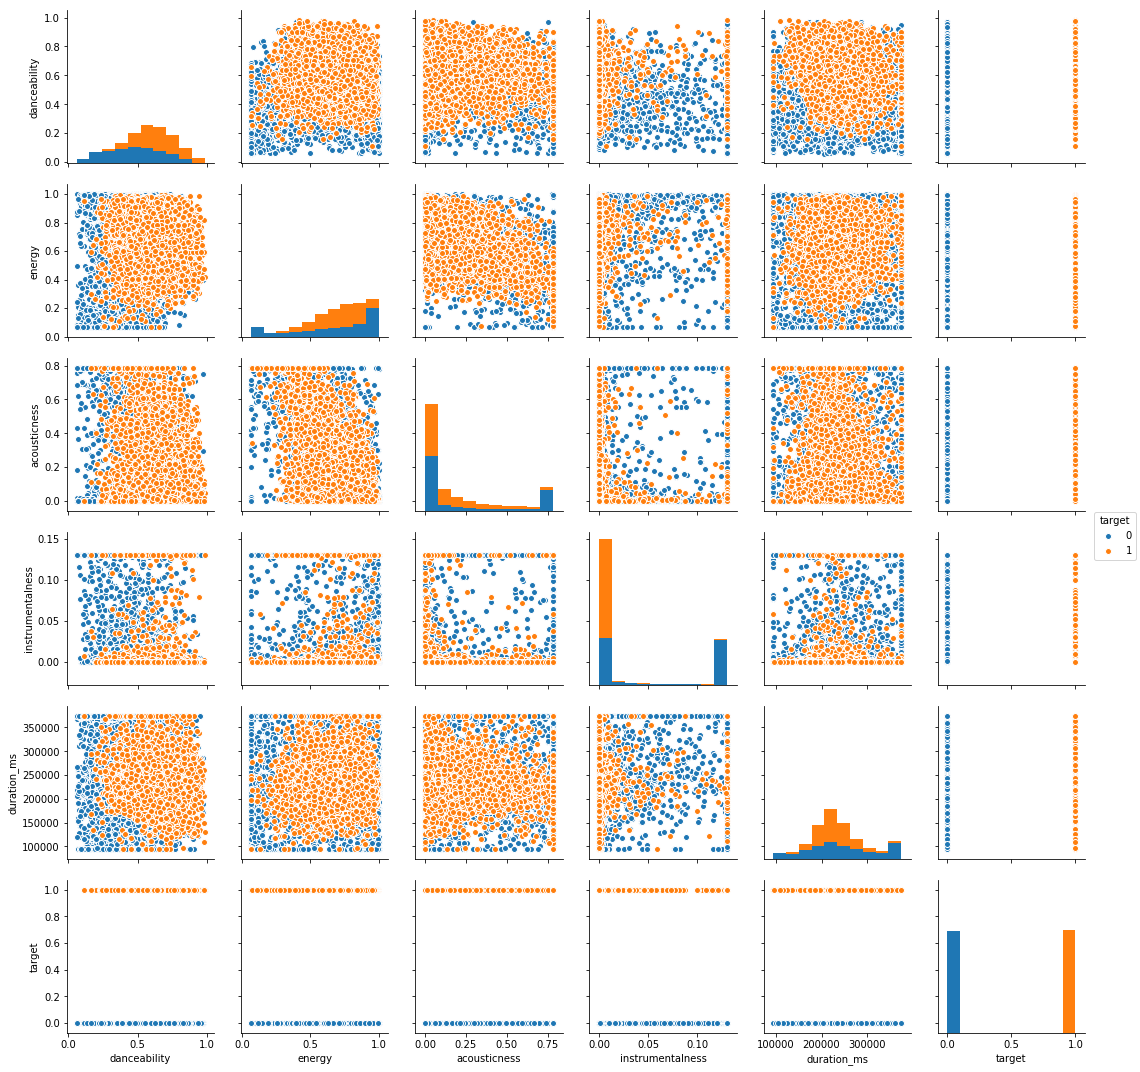

In [31]:
sns.pairplot(train_set_numerical.drop(['loudness','mode','time_signature','speechiness',
                                      'key','liveness','valence','tempo','chorus_hit','sections'],axis=1), hue="target", kind="scatter")
plt.show()

In [ ]:
sns.boxplot(x='diagnosis', y='area_mean', data=df)

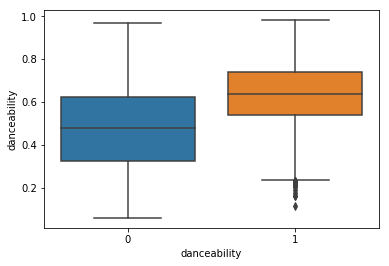

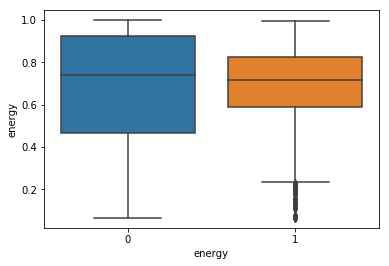

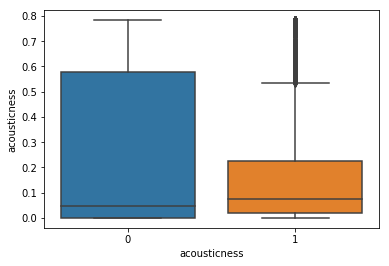

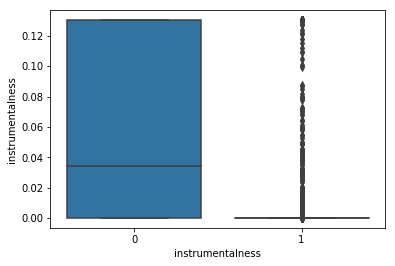

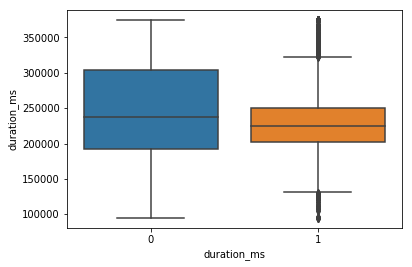

In [36]:
sns.boxplot(x='target', y='danceability',data=train_set_numerical)
plt.xlabel('danceability')
plt.show()

sns.boxplot(x='target', y='energy',data=train_set_numerical)
plt.xlabel('energy')
plt.show()
#sns.boxplot(data=std_X_train['key'])
#plt.xlabel('key')
#plt.show()

#sns.boxplot(data=std_X_train['loudness'])
#plt.xlabel('loudness')
#plt.show()

#sns.boxplot(data=std_X_train['mode'])
#plt.xlabel('mode')
#plt.show()

#sns.boxplot(data=std_X_train['speechiness'])
#plt.xlabel('speechiness')
#plt.show()
sns.boxplot(x='target', y='acousticness',data=train_set_numerical)
plt.xlabel('acousticness')
plt.show()

sns.boxplot(x='target', y='instrumentalness',data=train_set_numerical)
plt.xlabel('instrumentalness')
plt.show()

#sns.boxplot(data=std_X_train['valence'])
#plt.xlabel('valence')
#plt.show()

#sns.boxplot(data=std_X_train['tempo'])
#plt.xlabel('tempo')
#plt.show()

sns.boxplot(x='target', y='duration_ms',data=train_set_numerical)
plt.xlabel('duration_ms')
plt.show()

#sns.boxplot(data=std_X_train['chorus_hit'])
#plt.xlabel('chorus_hit')
#plt.show()

#sns.boxplot(data=std_X_train['sections'])
#plt.xlabel('sections')
#plt.show()

#sns.boxplot(data=std_X_train['liveness'])
#plt.xlabel('liveness')
#plt.show()


In [40]:
#Use cross-validation
from sklearn.model_selection import train_test_split
x_train=std_X_train
y_train=train_set_numerical['target']
#y_train
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, train_size=0.8, random_state=50)
#logistic regression with l1
x_test=std_x_test
y_test=test_set_n['target']

In [42]:
x_train_miss=std_X_train_miss
y_train_miss=df_train['target']
#y_train
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, train_size=0.8, random_state=50)
#logistic regression with l1
x_test_miss=std_x_test_miss
y_test_miss=df_test['target']

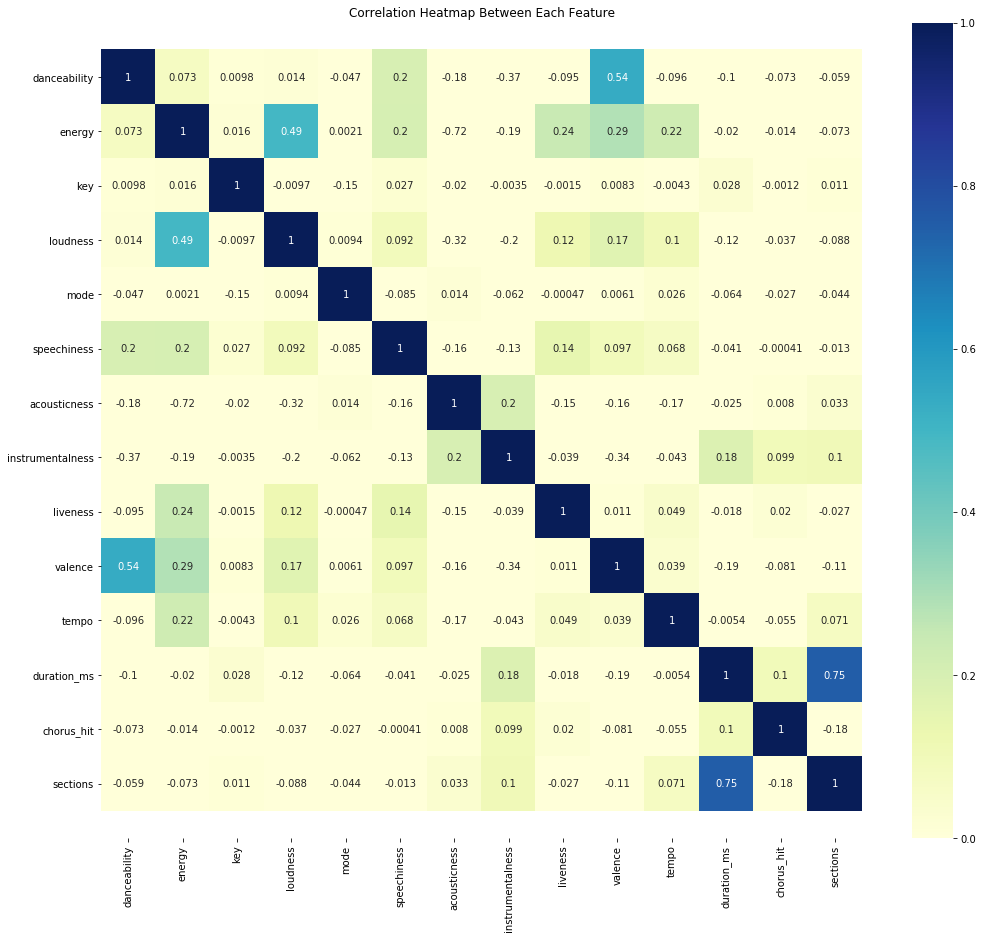

In [10]:
corrmat = std_X_train.corr()
plt.subplots(figsize=(18, 15))
ax = sns.heatmap(corrmat, vmax=1, annot=True, square=True, vmin=0,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Heatmap Between Each Feature')
plt.show()

In [45]:
#logistic regression
model_log=LogisticRegression(penalty="none")
model_log_n=model_log.fit(x_train, y_train)
model_log_miss=model_log.fit(x_train_miss, y_train_miss)
pred_train_log=model_log.predict(x_train)
pred_train_log_miss=model_log.predict(x_train_miss)

acc_train_logistic = accuracy_score(pred_train_log, y_train)
acc_train_logistic_miss = accuracy_score(pred_train_log_miss, y_train_miss)

print("the train accuracy =", acc_train_logistic)
print('REC of training set = ',recall_score(y_train,pred_train_log,average='micro'))
print('F1-Score of training set = ',f1_score(y_train,pred_train_log,average='micro'))
print("")
print("the train accuracy =", acc_train_logistic_miss)
print('REC of training set = ',recall_score(y_train_miss,pred_train_log_miss,average='micro'))
print('F1-Score of training set = ',f1_score(y_train_miss,pred_train_log_miss,average='micro'))

the train accuracy = 0.7933177141692982
REC of training set =  0.7933177141692982
F1-Score of training set =  0.7933177141692982

the train accuracy = 0.7831263471210099
REC of training set =  0.7831263471210099
F1-Score of training set =  0.7831263471210099


the best paramater =  {'C': 3.593813663804626}
best accuracy in validation =  0.7968821880969006

the train accuracy = 0.7962717734542121
REC of training set =  0.7962717734542121
F1-Score of training set =  0.7962717734542121



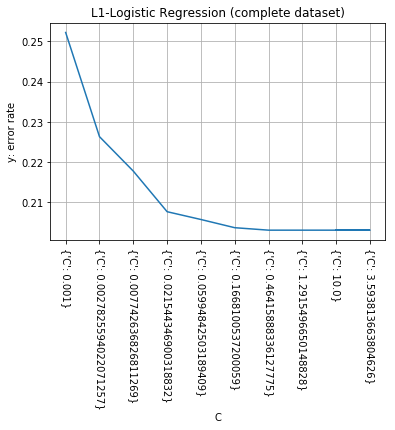

In [91]:
model_logistic_l1 = LogisticRegression(penalty="l1",solver="liblinear")

# search the best params-select model

grid_logistic_l1= {'C': np.logspace(-3,1,10)}

params_logistic = GridSearchCV(model_logistic_l1, grid_logistic_l1,cv=5)
params_logistic.fit(x_train, y_train)

pred_train_logistic = params_logistic.predict(x_train)

# get the accuracy score
acc_train_logistic = accuracy_score(pred_train_logistic, y_train)
#acc_test_logistic = accuracy_score(pred_test_logistic, y_test)

print("the best paramater = ",params_logistic.best_params_)
print("best accuracy in validation = ",params_logistic.best_score_)
print("")
print("the train accuracy =", acc_train_logistic)
print('REC of training set = ',recall_score(y_train,pred_train_logistic,average='micro'))
print('F1-Score of training set = ',f1_score(y_train,pred_train_logistic,average='micro'))
print("")
dict_l1=params_logistic.cv_results_
x_p=dict_l1['params']
y_p=1-dict_l1['mean_test_score']
plt.plot(x_p,y_p)
plt.xticks(rotation=270)
plt.xlabel('C')
plt.ylabel('y: error rate')
plt.title('L1-Logistic Regression (complete dataset)')
plt.grid()
plt.show()

In [93]:
model_logistic_l1 = LogisticRegression(penalty="l1",solver="liblinear")

# search the best params-select model

grid_logistic_l1= {'C': np.logspace(-3,1,10)}

params_logistic_miss = GridSearchCV(model_logistic_l1, grid_logistic_l1,cv=5)
params_logistic_miss.fit(x_train_miss, y_train_miss)

pred_train_logistic_miss = params_logistic_miss.predict(x_train_miss)

# get the accuracy score
acc_train_logistic_miss = accuracy_score(pred_train_logistic_miss, y_train_miss)
#acc_test_logistic = accuracy_score(pred_test_logistic, y_test)

print("the best paramater = ",params_logistic_miss.best_params_)
print("best accuracy in validation = ",params_logistic_miss.best_score_)
print("")
print("the train accuracy =", acc_train_logistic_miss)
print('REC of training set = ',recall_score(y_train_miss,pred_train_logistic_miss,average='micro'))
print('F1-Score of training set = ',f1_score(y_train_miss,pred_train_logistic_miss,average='micro'))
print("")

the best paramater =  {'C': 1.2915496650148828}
best accuracy in validation =  0.783333315774003

the train accuracy = 0.7832289849122447
REC of training set =  0.7832289849122447
F1-Score of training set =  0.7832289849122447



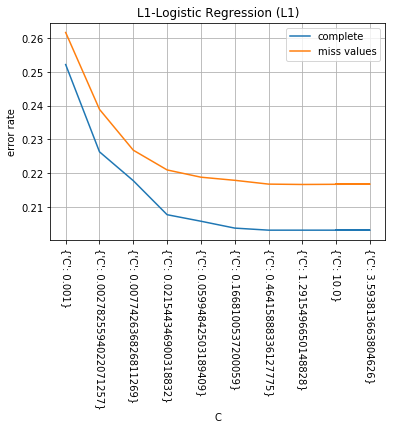

In [98]:
dict_l1=params_logistic.cv_results_
dict_l1_miss=params_logistic_miss.cv_results_
x_p=dict_l1['params']
y_p1=1-dict_l1['mean_test_score']
y_p2=1-dict_l1_miss['mean_test_score']
plt.plot(x,y_p1,"-",label="complete")
plt.plot(x,y_p2,"-",label="miss values")
plt.legend(loc='upper right')
plt.xticks(rotation=270)
plt.xlabel('C')
plt.ylabel('error rate')
plt.title('L1-Logistic Regression (L1)')
plt.grid()
plt.show()


In [53]:
x_train.shape
y_train.shape

(9817,)

In [68]:
params_logistic.cv_results_

{'mean_fit_time': array([0.0123888 , 0.00997152, 0.01376228, 0.01795731, 0.01894703,
        0.01855254, 0.01894736, 0.01795325, 0.01835093, 0.01872344]),
 'mean_score_time': array([0.00319114, 0.00139952, 0.00119686, 0.00158978, 0.001794  ,
        0.00099688, 0.00119858, 0.00179496, 0.0013947 , 0.00139427]),
 'mean_test_score': array([0.74778374, 0.77365711, 0.78231535, 0.79239977, 0.79423365,
        0.79627088, 0.7967802 , 0.79688214, 0.79688219, 0.7967803 ]),
 'param_C': masked_array(data=[0.001, 0.0027825594022071257, 0.007742636826811269,
                    0.021544346900318832, 0.05994842503189409,
                    0.1668100537200059, 0.46415888336127775,
                    1.2915496650148828, 3.593813663804626, 10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.0027825594022071257},
  {'C': 0.007742636826811269},
  {'C'

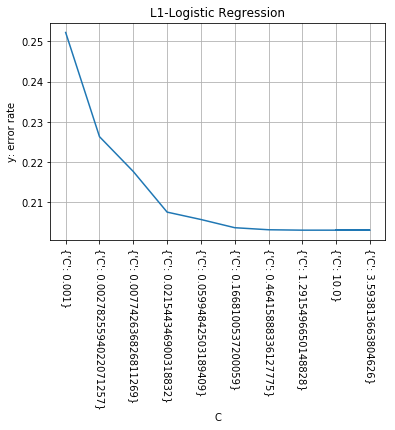

In [70]:
dict_l1=params_logistic.cv_results_
x=dict_l1['params']
y=1-dict_l1['mean_test_score']
plt.plot(x,y)
plt.xticks(rotation=270)
plt.xlabel('C')
plt.ylabel('y: error rate')
plt.title('L1-Logistic Regression')
plt.grid()
plt.show()

In [99]:
#logistic regression with l2

model_logistic_l2 = LogisticRegression(penalty="l2",solver="liblinear")

# search the best params-select model

grid_logistic_l2= {'C': np.logspace(-3,3,10)}

params_logistic_l2 = GridSearchCV(model_logistic_l2, grid_logistic_l2,cv=5)
params_logistic_l2.fit(x_train, y_train)

pred_train_logistic_l2= params_logistic_l2.predict(x_train)
#pred_test_logistic_l2=params_logistic_l2.predict(x_test)

# get the accuracy score
acc_train_logistic_l2 = accuracy_score(pred_train_logistic_l2, y_train)
#acc_test_logistic_l2 = accuracy_score(pred_test_logistic_l2, y_test)

print("the best paramater = ",params_logistic_l2.best_params_)
print("best accuracy in validation = ",params_logistic_l2.best_score_)
print("")
print("the train accuracy =", acc_train_logistic_l2)
print('REC of training set = ',recall_score(y_train,pred_train_logistic_l2,average='micro'))
print('F1-Score of training set = ',f1_score(y_train,pred_train_logistic_l2,average='micro'))
print("")
#print("the test accuracy =", acc_test_logistic_l2)
#print('REC of test set = ',recall_score(y_test,pred_test_logistic_l2,average='micro'))
#print('F1-Score of test set = ',f1_score(y_test,pred_test_logistic_l2,average='micro'))

the best paramater =  {'C': 0.46415888336127775}
best accuracy in validation =  0.7968821880969006

the train accuracy = 0.7959661811143934
REC of training set =  0.7959661811143934
F1-Score of training set =  0.7959661811143934



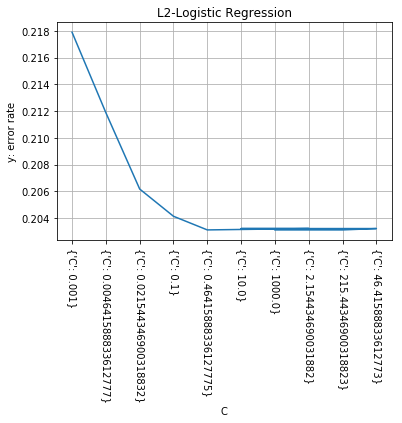

In [18]:
dict_l2=params_logistic_l2.cv_results_
x=dict_l2['params']
y=1-dict_l2['mean_test_score']
plt.plot(x,y)
plt.xticks(rotation=270)
plt.xlabel('C')
plt.ylabel('y: error rate')
plt.title('L2-Logistic Regression')
plt.grid()
plt.show()

In [101]:
#decision tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model_tree = tree.DecisionTreeClassifier()

# search the best params
#'min_samples_split': [5, 10, 20, 50, 100,200, 500],
grid_tree= {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_leaf': [1, 2, 4,8,16]}

params_tree = GridSearchCV(model_tree, grid_tree,cv=5)
params_tree.fit(x_train, y_train)

pred_tree = params_tree.predict(x_test)

pred_train_tree= params_tree.predict(x_train)
#pred_test_tree= params_tree.predict(x_test)

# get the accuracy score
acc_train_tree = accuracy_score(pred_train_tree, y_train)
#acc_test_tree = accuracy_score(pred_test_tree, y_test)


# get the accuracy score
#acc_tree = accuracy_score(pred_tree, y_test)
#print("the validation error=", acc_tree)
#print(params_tree.best_params_)

print("the best paramater = ",params_tree.best_params_)
print("best accuracy in validation = ",params_tree.best_score_)
print("")
print("the train accuracy =", acc_train_tree)
print('REC of training set = ',recall_score(y_train,pred_train_tree,average='micro'))
print('F1-Score of training set = ',f1_score(y_train,pred_train_tree,average='micro'))

the best paramater =  {'max_depth': 10, 'min_samples_leaf': 8}
best accuracy in validation =  0.8140981373329197

the train accuracy = 0.8696139350106957
REC of training set =  0.8696139350106957
F1-Score of training set =  0.8696139350106957


In [104]:
model_tree_miss = tree.DecisionTreeClassifier()

# search the best params
#'min_samples_split': [5, 10, 20, 50, 100,200, 500],
grid_tree= {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_leaf': [1, 2, 4,8,16]}

params_tree_miss = GridSearchCV(model_tree_miss, grid_tree,cv=5)
params_tree_miss.fit(x_train_miss, y_train_miss)

pred_train_tree_miss= params_tree.predict(x_train_miss)

# get the accuracy score
acc_train_tree_miss = accuracy_score(pred_train_tree_miss, y_train_miss)

print("the best paramater = ",params_tree_miss.best_params_)
print("best accuracy in validation = ",params_tree_miss.best_score_)
print("")
print("the train accuracy =", acc_train_tree_miss)
print('REC of training set = ',recall_score(y_train_miss,pred_train_tree_miss,average='micro'))
print('F1-Score of training set = ',f1_score(y_train_miss,pred_train_tree_miss,average='micro'))

the best paramater =  {'max_depth': 10, 'min_samples_leaf': 16}
best accuracy in validation =  0.8055024268750468

the train accuracy = 0.8080673303910499
REC of training set =  0.8080673303910499
F1-Score of training set =  0.8080673303910499


In [51]:
#the code is modified from https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
def Plotgridsearch(cv_results, grid_param_2, grid_param_1, name_param_1, name_param_2):
    
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

        ax.set_title("GridSearch Scores with Maxdepth & min samples leaf")
        ax.set_xlabel(name_param_1)
        ax.set_ylabel('CV Score', fontsize=16)
        ax.legend(loc="best", fontsize=5)
        ax.grid('on')

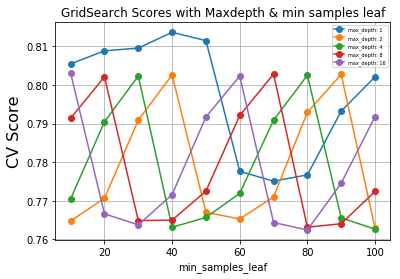

In [52]:
#min_samples_split=[5, 10, 20, 50, 100,200, 500]
max_depth=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
min_samples_leaf=[1, 2, 4,8,16]
Plotgridsearch(params_tree.cv_results_, min_samples_leaf, max_depth, 'min_samples_leaf','max_depth')

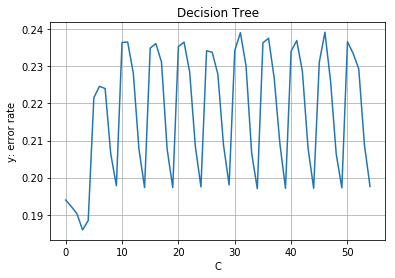

In [106]:
dict_tree=params_tree.cv_results_
array=np.array(dict_tree['params'])
x_tree=[]
for i in array:
    i=dict_tree['params'].index(i)
    x_tree.append(i)
x_tree
y=1-dict_tree['mean_test_score']
#plt.figure(figsize=(12, 5))
plt.plot(x_tree,y)
#plt.xticks(rotation=270)
plt.xlabel('C')
plt.ylabel('y: error rate')
plt.title('Decision Tree')
plt.grid()
plt.show()

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()

# search the best params
#grid_rf = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}
grid_rf={'max_depth': [2,5,10, 20, None],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [10,50,100,200, 300, 400, 500]}

clf_rf = RandomizedSearchCV(rf, grid_rf, cv=5)
clf_rf.fit(x_train, y_train)

pred_train_rf= clf_rf.predict(x_train)
#pred_test_rf= clf_rf.predict(x_test)

# get the accuracy score
acc_train_rf = accuracy_score(pred_train_rf, y_train)
#acc_test_rf = accuracy_score(pred_test_rf, y_test)

# get the accuracy score
#acc_tree = accuracy_score(pred_tree, y_test)
#print("the validation error=", acc_tree)
#print(params_tree.best_params_)

print("the best paramater = ",clf_rf.best_params_)
print("best accuracy in validation = ",clf_rf.best_score_)
print("")
print("the train accuracy =", acc_train_rf)
print('REC of training set = ',recall_score(y_train,pred_train_rf,average='micro'))
print('F1-Score of training set = ',f1_score(y_train,pred_train_rf,average='micro'))
print("")

the best paramater =  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
best accuracy in validation =  0.8468981140923791

the train accuracy = 0.993276968523989
REC of training set =  0.993276968523989
F1-Score of training set =  0.993276968523989



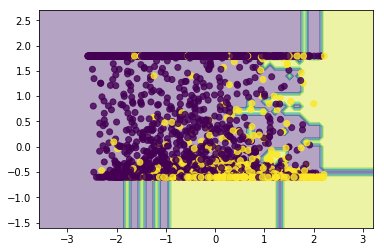

In [157]:
x=x_train[['danceability','instrumentalness']]
y=y_train

rf_b = RandomForestClassifier(n_estimators=100, min_samples_split=5,
                            min_samples_leaf=1, max_depth=None)
rf_b.fit(x,y)

#h=.02
#x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
#y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
#Z = clf_rf.predict(np.c_[xx.ravel(), yy.ravel()])    

x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

Z = rf_b.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, alpha=0.8)
plt.show()

In [117]:
rf_miss = RandomForestClassifier()

# search the best params
#grid_rf = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}
grid_rf_miss={'max_depth': [2,5,10, 20, None],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [10,50,100,200, 300, 400, 500]}

clf_rf_miss= RandomizedSearchCV(rf_miss, grid_rf_miss, cv=5)
clf_rf_miss.fit(x_train_miss, y_train_miss)

pred_train_rf_miss= clf_rf_miss.predict(x_train_miss)

acc_train_rf_miss = accuracy_score(pred_train_rf_miss, y_train_miss)


print("the best paramater = ",clf_rf_miss.best_params_)
print("best accuracy in validation = ",clf_rf_miss.best_score_)
print("")
print("the train accuracy =", acc_train_rf_miss)
print('REC of training set = ',recall_score(y_train_miss,pred_train_rf_miss,average='micro'))
print('F1-Score of training set = ',f1_score(y_train_miss,pred_train_rf_miss,average='micro'))
print("")

the best paramater =  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
best accuracy in validation =  0.8393727420896095

the train accuracy = 0.9341065380273017
REC of training set =  0.9341065380273017
F1-Score of training set =  0.9341065380273017



In [108]:
rf_ft = RandomForestClassifier(n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_depth=None)
rf_ft.fit(x_train, y_train)
arr_imp=rf_ft.feature_importances_
df_imp=pd.DataFrame(arr_imp)
df_imp.index=['danceability','energy','key','loudness','mode','speechiness','acousticness',
                   'instrumentalness','liveness','valence','tempo','duration_ms','chorus_hit',
                    'sections']
df_imp.columns = ['weight']
df_imp

weight
danceability      0.119241
energy            0.089454
key               0.021190
loudness          0.024782
mode              0.005958
speechiness       0.045117
acousticness      0.112833
instrumentalness  0.283649
liveness          0.036160
valence           0.067785
tempo             0.038000
duration_ms       0.091831
chorus_hit        0.035635
sections          0.028364

In [109]:
clf_rf.cv_results_

{'mean_fit_time': array([ 0.82580228, 13.46645923,  3.19709287,  7.31520963,  5.6301712 ,
         0.08769679,  3.26112823, 11.53586755, 13.11668444,  0.77675943]),
 'mean_score_time': array([0.03649168, 0.36834331, 0.0920238 , 0.23152113, 0.21426129,
        0.00864916, 0.09166565, 0.32688484, 0.38946753, 0.03474975]),
 'mean_test_score': array([0.82153267, 0.84557351, 0.84435068, 0.83946119, 0.82285655,
        0.79647569, 0.84689811, 0.83813695, 0.84567503, 0.82265299]),
 'param_max_depth': masked_array(data=[5, 20, 20, 10, 5, 2, None, 10, 20, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[4, 1, 4, 2, 2, 4, 1, 4, 1, 2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array

In [112]:
dict_rf=clf_rf.cv_results_
array=np.array(dict_rf['params'])
array

array([{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5},
       {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20},
       {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20},
       {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10},
       {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5},
       {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 2},
       {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None},
       {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10},
       {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20},
       {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5}],
      dtype=object)

In [113]:
x=[]
for i in array:
    i=dict_rf['params'].index(i)
    x.append(i)
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

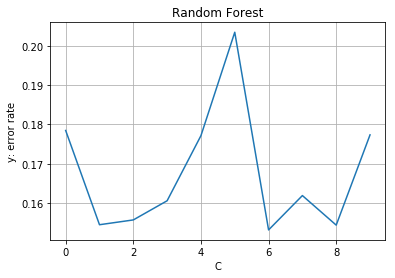

In [139]:


y=1-dict_rf['mean_test_score']
#plt.figure(figsize=(12, 5))
plt.plot(x,y)
#plt.xticks(rotation=270)
plt.xlabel('C')
plt.ylabel('y: error rate')
plt.title('Random Forest')
plt.grid()
plt.show()

In [119]:
from sklearn.ensemble import AdaBoostClassifier

adaboost=AdaBoostClassifier()
grid_ada={'n_estimators':[100,200,300,400,500],
          'learning_rate':[0.025,0.05, 0.1, 0.15,0.20,0.25,0.30]}

param_ada=GridSearchCV(adaboost, grid_ada, cv=5)
param_ada.fit(x_train, y_train)

pred_train_ada= param_ada.predict(x_train)
#pred_test_ada= param_ada.predict(x_test)

acc_train_ada = accuracy_score(pred_train_ada, y_train)
#acc_test_ada = accuracy_score(pred_test_ada, y_test)

# get the accuracy score
#acc_tree = accuracy_score(pred_tree, y_test)
#print("the validation error=", acc_tree)
#print(params_tree.best_params_)

print("the best paramater = ",param_ada.best_params_)
print("best accuracy in validation = ",param_ada.best_score_)
print("")
print("the train accuracy =", acc_train_ada)
print('REC of training set = ',recall_score(y_train,pred_train_ada,average='micro'))
print('F1-Score of training set = ',f1_score(y_train,pred_train_ada,average='micro'))

the best paramater =  {'learning_rate': 0.1, 'n_estimators': 400}
best accuracy in validation =  0.8347755783418911

the train accuracy = 0.8421106244270143
REC of training set =  0.8421106244270143
F1-Score of training set =  0.8421106244270143


In [121]:
dict_ada=param_ada.cv_results_
array_ada=np.array(dict_ada['params'])
array_ada

array([{'learning_rate': 0.025, 'n_estimators': 100},
       {'learning_rate': 0.025, 'n_estimators': 200},
       {'learning_rate': 0.025, 'n_estimators': 300},
       {'learning_rate': 0.025, 'n_estimators': 400},
       {'learning_rate': 0.025, 'n_estimators': 500},
       {'learning_rate': 0.05, 'n_estimators': 100},
       {'learning_rate': 0.05, 'n_estimators': 200},
       {'learning_rate': 0.05, 'n_estimators': 300},
       {'learning_rate': 0.05, 'n_estimators': 400},
       {'learning_rate': 0.05, 'n_estimators': 500},
       {'learning_rate': 0.1, 'n_estimators': 100},
       {'learning_rate': 0.1, 'n_estimators': 200},
       {'learning_rate': 0.1, 'n_estimators': 300},
       {'learning_rate': 0.1, 'n_estimators': 400},
       {'learning_rate': 0.1, 'n_estimators': 500},
       {'learning_rate': 0.15, 'n_estimators': 100},
       {'learning_rate': 0.15, 'n_estimators': 200},
       {'learning_rate': 0.15, 'n_estimators': 300},
       {'learning_rate': 0.15, 'n_estimators':

In [130]:
x_ada=[]
for i in array_ada:
    i=dict_ada['params'].index(i)
    x_ada.append(i)
#x_ada

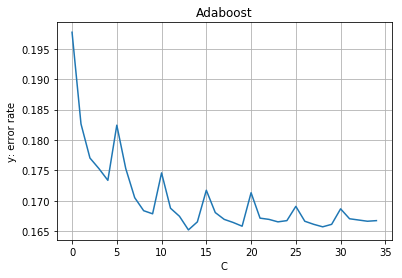

In [138]:
y_ada=1-dict_ada['mean_test_score']
#plt.figure(figsize=(12, 5))
plt.plot(x_ada,y_ada)
#plt.xticks(rotation=270)
plt.xlabel('C')
plt.ylabel('y: error rate')
plt.title('Adaboost')
plt.grid()
plt.show()

In [129]:
adaboost_miss=AdaBoostClassifier()
grid_miss={'n_estimators':[100,200,300,400,500],
          'learning_rate':[0.025,0.05, 0.1, 0.15,0.20,0.25,0.30]}

param_ada_miss=GridSearchCV(adaboost_miss, grid_miss, cv=5)
param_ada_miss.fit(x_train_miss, y_train_miss)
pred_train_ada_miss= param_ada_miss.predict(x_train_miss)
#pred_test_ada= param_ada.predict(x_test)

acc_train_ada_miss = accuracy_score(pred_train_ada_miss, y_train_miss)
#acc_test_ada = accuracy_score(pred_test_ada, y_test)

# get the accuracy score
#acc_tree = accuracy_score(pred_tree, y_test)
#print("the validation error=", acc_tree)
#print(params_tree.best_params_)

print("the best paramater = ",param_ada_miss.best_params_)
print("best accuracy in validation = ",param_ada_miss.best_score_)
print("")
print("the train accuracy =", acc_train_ada_miss)
print('REC of training set = ',recall_score(y_train_miss,pred_train_ada_miss,average='micro'))
print('F1-Score of training set = ',f1_score(y_train_miss,pred_train_ada_miss,average='micro'))

the best paramater =  {'learning_rate': 0.15, 'n_estimators': 400}
best accuracy in validation =  0.8260307239114884

the train accuracy = 0.8336241404084984
REC of training set =  0.8336241404084984
F1-Score of training set =  0.8336241404084984


In [140]:
df1_semi=pd.read_csv('C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/dataset-of-00s.csv')
df2_semi=pd.read_csv('C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/dataset-of-10s.csv')
DATA_semi=pd.concat([df1_semi,df2_semi])
DATA_numerical_semi=DATA_semi.drop(['track','artist','uri','time_signature'], axis=1)
DATA_numerical_semi

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.5780  0.4710    4    -7.270     1       0.0289      0.368000   
1           0.7040  0.8540   10    -5.477     0       0.1830      0.018500   
2           0.1620  0.8360    9    -3.009     1       0.0473      0.000111   
3           0.1880  0.9940    4    -3.745     1       0.1660      0.000007   
4           0.6300  0.7640    2    -4.353     1       0.0275      0.363000   
5           0.7260  0.8370   11    -7.223     0       0.0965      0.373000   
6           0.3650  0.9220    1    -2.644     1       0.0710      0.002850   
7           0.7260  0.6310   11    -8.136     0       0.0334      0.220000   
8           0.4810  0.7860   10    -5.654     1       0.0288      0.053800   
9           0.6470  0.3240    7    -9.679     1       0.0377      0.354000   
10          0.7870  0.6320    8    -3.487     1       0.1370      0.103000   
11          0.4910  0.7760    2    -3.887     1       0.0393      0.314000   
12          0.4550  0.7370    1    -6.206     1       0.0272      0.001140   
13          0.7250  0.7330    0    -6.660     1       0.0242      0.508000   
14          0.4970  0.4210    2   -14.059     0       0.1870      0.985000   
15          0.5090  0.9420   11    -6.899     1       0.0628      0.000639   
16          0.7080  0.7280    7    -7.039     1       0.0298      0.011000   
17          0.5180  0.9160    3    -3.858     1       0.0454      0.000148   
18          0.3950  0.2480    1   -10.025     1       0.0519      0.979000   
19          0.3780  0.9530    9    -3.632     1       0.1380      0.000719   
20          0.9000  0.5930   10    -6.629     0       0.3330      0.055400   
21          0.3290  0.8120    2   -11.480     1       0.0872      0.014100   
22          0.3890  0.5980    4    -8.473     1       0.0363      0.782000   
23          0.7440  0.6970   11    -5.063     0       0.1970      0.010600   
24          0.7230  0.7850    5    -5.722     1       0.0302      0.024700   
25          0.5600  0.8080   10    -6.725     1       0.0306      0.200000   
26          0.6430  0.3910   10   -10.090     1       0.0296      0.622000   
27          0.7350  0.7320   10    -8.915     1       0.0699      0.572000   
28          0.5360  0.0810    8   -20.968     1       0.0877      0.958000   
29          0.5870  0.8800    4    -5.725     1       0.0324      0.078400   
...            ...     ...  ...       ...   ...          ...           ...   
6368        0.8550  0.9680    1    -3.278     1       0.1570      0.014300   
6369        0.3890  0.1270    7   -16.157     0       0.0392      0.990000   
6370        0.2060  0.9950    8    -5.096     1       0.1940      0.013100   
6371        0.5260  0.8720    7    -5.079     1       0.0428      0.245000   
6372        0.7570  0.6180   11    -7.964     0       0.0282      0.262000   
6373        0.5180  0.1360    2   -17.510     0       0.0718      0.994000   
6374        0.4000  0.0831   10   -21.565     1       0.0740      0.986000   
6375        0.5080  0.9200    1    -4.387     1       0.0489      0.000007   
6376        0.3000  0.9830    5    -5.809     0       0.0816      0.000244   
6377        0.6280  0.6380   11    -8.033     1       0.0302      0.293000   
6378        0.2710  0.9820    7    -4.295     1       0.1210      0.000258   
6379        0.4390  0.9930   11    -2.923     1       0.1000      0.000937   
6380        0.7000  0.7420    5    -6.777     0       0.0716      0.072200   
6381        0.7860  0.8540    2    -4.247     1       0.0523      0.072900   
6382        0.0934  0.1880   10   -16.340     0       0.0399      0.940000   
6383        0.2970  0.4100    4   -16.100     0       0.0368      0.273000   
6384        0.3950  0.9270    4    -4.418     1       0.1650      0.116000   
6385        0.8020  0.8200   10    -5.969     0       0.1460      0.057900   
6386        0.3960  0.0440    9   -25.088     0       0.0370      0.984000   
6387        0.5650  0.8050  

In [141]:
#the code is modified from https://www.jianshu.com/p/2aad8205738c 
import numpy as np
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score,recall_score,f1_score
x_semi = DATA_numerical_semi
labels = x_semi.target
x_train_semi=DATA_numerical_semi.drop(['target'])
reg=np.random.RandomState(42)
random_unlabeled_points = reg.rand(len(x_semi.target))<0.3
#random_unlabeled_points = random_unlabeled_points
y=labels[random_unlabeled_points] #the label before delete the labels
labels[random_unlabeled_points]=-1 # make these labels become unlabeled data
print('Unlabeled Number:',list(labels).count(-1))

semi_model = LabelPropagation()
semi_model.fit(x_train_semi,labels)
y_pred = semi_model.predict(x_train_semi)
y_pred = y_pred[random_unlabeled_points] # predict the unlabeled data
print('accuracy',accuracy_score(y,y_pred))
print('Recall',recall_score(y,y_pred,average='micro'))
print('F1-Score',f1_score(y,y_pred,average='micro'))

Unlabeled Number: 3720
accuracy 0.5069892473118279
Recall 0.5069892473118279
F1-Score 0.5069892473118279


In [159]:
rf_final = RandomForestClassifier(n_estimators=100, min_samples_split=5,
                            min_samples_leaf=1, max_depth=None)

rf_final.fit(x_train, y_train)

pred_train_rf= rf_final.predict(x_train)
pred_test_rf= rf_final.predict(x_test)

# get the accuracy score
acc_train_rf = accuracy_score(pred_train_rf, y_train)
acc_test_rf = accuracy_score(pred_test_rf, y_test)

#print("the train accuracy =", acc_train_rf)
#print('REC of training set = ',recall_score(y_train,pred_train_rf,average='micro'))
#print('F1-Score of training set = ',f1_score(y_train,pred_train_rf,average='micro'))

print("the train accuracy =", acc_test_rf)
print('REC of training set = ',recall_score(y_test,pred_test_rf,average='micro'))
print('F1-Score of training set = ',f1_score(y_test,pred_test_rf,average='micro'))
print("")

the train accuracy = 0.8320423970648186
REC of training set =  0.8320423970648186
F1-Score of training set =  0.8320423970648186



In [163]:
import pickle
with open('model.pickle', 'wb') as file:
    pickle.dump(rf_final, file)

In [162]:
#baseline
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(x_train)
#array([1, 1, 1, 1])
dummy_clf.predict(x_test)
dummy_clf.score(x_train, y_train)
dummy_clf.score(x_test, y_test)

0.4912352221769262